<a href="https://colab.research.google.com/github/Felipe-Cancio/Dinamic-Draft-Reading/blob/master/Notebooks/leitura_calado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
%matplotlib inline

In [22]:
# Importando as bibliotecas necessárias
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

In [23]:
# VISUALIZAR IMAGEM
def displayImg(img, title):
  plt.figure(figsize=(32,32))
  plt.subplot(122),plt.imshow(img)
  plt.title(title), plt.xticks([]), plt.yticks([])
  plt.show()

# VISUALIZAR A COMPARAÇÃO DE DUAS IMAGENS
def compareImgs(image1, image2, title1, title2, cmap=None):
  plt.figure(figsize=(22,22))
  plt.subplot(121),plt.imshow(image1, cmap=cmap)
  plt.title(title2), plt.xticks([]), plt.yticks([])
  plt.figure(figsize=(22,22))
  plt.subplot(122),plt.imshow(image2, cmap=cmap)
  plt.title(title2), plt.xticks([]), plt.yticks([])
  plt.show()

In [24]:
# # EXEC GOOGLE COLAB
# # Montando o Drive
# from google.colab import drive
# drive.mount('/content/drive/MyDrive/IFMA/II Hackaton Softex IFMA DCOMP 2023/Programação/Imagens')

In [25]:
# # EXEC GOOGLE COLAB
# # Caminho da imagem de teste no drive
# path = '1.jpg'
# # image = cv.imread(path)                    # Lendo a imagem usando opencv
# image = plt.imread(path)                    # Lendo a imagem usando matplotlib
# gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY) # Transformando a imagem p/ escala de cinza
# grayf32 = np.float32(gray)                     # Convertendo o ndarray p/ float32 (necessário p/ o Harris Algorithm)
# dst = cv.cornerHarris(grayf32,4,3,0.001)       # Detectando os cantos

# #resultado é dilatado para marcar os cantos (não importante)
# dst = cv.dilate(dst,None)
# cornerImg = image.copy()          # Cópia do ndarray p/ poder fzr alterações
# trshd = dst>0.01*dst.max()        # Definindo threshold
# cornerImg[trshd]=[255,0,0]        # Aplicando threshold visualização dos cantos (> 1% do maior valor)

# # compareImg(image, cornerImg)    # Comparando as imagens antes e depois da detecção dos cantos
# displayImg(cornerImg, 'Corner Image')             # Mostrar a marcação dos cantos

In [26]:
# # EXEC GOOGLE COLAB
# # Canny Edge Detection
# edges = cv.Canny(gray,50,100)
# compareImgs(gray, edges)

In [27]:
# # EXEC GOOGLE COLAB
# # Hough Line Trasnform
# copy = image.copy()   # Fazendo uma cópia da imagem original para desenhar as retas

# # # CLÁSSICA
# # lines = cv.HoughLines(edges, 1, np.pi/180, 150, None, 0, 0)
# # if lines is not None:
# #   for i in range(0, len(lines)):-
# #     rho = lines[i][0][0]
# #     theta = lines[i][0][1]
# #     a = np.cos(theta)
# #     b = np.sin(theta)
# #     x0 = a * rho
# #     y0 = b * rho
# #     pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
# #     pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
# #     cv.line(copy, pt1, pt2, (0,0,255), 3, cv.LINE_AA)

# # PROBABILÍSTICA
# linesP = cv.HoughLinesP(edges, 1, np.pi/180, 50, None, 50, 10)

# if linesP is not None:
#   for i in range(0, len(linesP)):
#     l = linesP[i][0]
#     cv.line(copy, (l[0], l[1]), (l[2], l[3]), (255,0,0), 3, cv.LINE_AA)

# displayImg(copy, 'Hough Transform')

In [54]:
# EXEC JUPYTER NOTEBOOK
# Biblioteca p/ adicionar interatividade ao Jupyter 
from ipywidgets import interact, interactive, interact_manual

# Definindo uma lista com o caminho de cada imagem do conjunto
paths = ['../imagens/' + str(i) + '.jpg' for i in range(1,21)]

# Função p/ carregar as imagens
def loadImages(path):
  # Deixando as imagens com escopo global 
  global image  
  global gray

  image = plt.imread(path)                    # Lendo a imagem usando matplotlib
  gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY) # Transformando a imagem p/ escala de cinza

interactive(loadImages, path=paths)

interactive(children=(Dropdown(description='path', options=('../imagens/1.jpg', '../imagens/2.jpg', '../imagen…

In [58]:
# EXEC JUPYTER NOTEBOOK
# IMG ORIGINAL VS DETECÇÃO DE CANTOS INTERATIVA
def compareCorner(blockSize, ksize, k):
  global harrisParams         # Variavel p/ salvar os parâmetros
  grayf32 = np.float32(gray)  # Convertendo o ndarray p/ float32 (necessário p/ o Harris Algorithm)
  dst = cv.cornerHarris(grayf32,blockSize,ksize,k)  # Detectando os cantos

  #resultado é dilatado para marcar os cantos (não importante)
  dst = cv.dilate(dst,None)
  cornerImg = image.copy()          # Cópia do ndarray p/ poder fzr alterações
  trshd = dst>0.01*dst.max()        # Definindo threshold
  cornerImg[trshd]=[255,0,0]        # Aplicando threshold visualização dos cantos (> 1% do maior valor)
  
  compareImgs(image, cornerImg, 'Original Image', 'Corner Image')
  harrisParams = [blockSize, ksize, k]
  
interactive(compareCorner, blockSize=(1,12), ksize=(1,15,2), k=(0.001,0.01,0.001))
  
# # Achando as coordenadas do maior e menor canto (que esta mais acima e mais abaixo)
# y,x = np.where(trshd == True)     # Achando as coordenadas de todos os cantos
# print(f'Coordenada maior canto (h,l): ({y[0]},{x[0]})')
# print(f'Coordenada menor canto (h,l): ({y[-1]},{x[-1]})')

# Desenhar retas para baixo a partir de ponto
# for i in range(y[-1],1080):
#   im[i,x[-1]] = [0,0,255]

interactive(children=(IntSlider(value=6, description='blockSize', max=12, min=1), IntSlider(value=7, descripti…

In [59]:
# EXEC JUPYTER NOTEBOOK
# Canny Edge Detection
# ORIGINAL VS DETECÇÃO DE BORDAS INTERATIVA
def compareEdges(minTreshould, maxTreshould):
  global edges
  global cannyParams
  
  edges = cv.Canny(gray,minTreshould, maxTreshould)
  compareImgs(image, edges, 'Original Image', 'Edges Image', cmap='gray')
  cannyParams = [minTreshould, maxTreshould] 
  
interactive(compareEdges, minTreshould=(10,300,10), maxTreshould=(20,400,10)) # 250,350 - 50,100 - 40,120

interactive(children=(IntSlider(value=150, description='minTreshould', max=300, min=10, step=10), IntSlider(va…

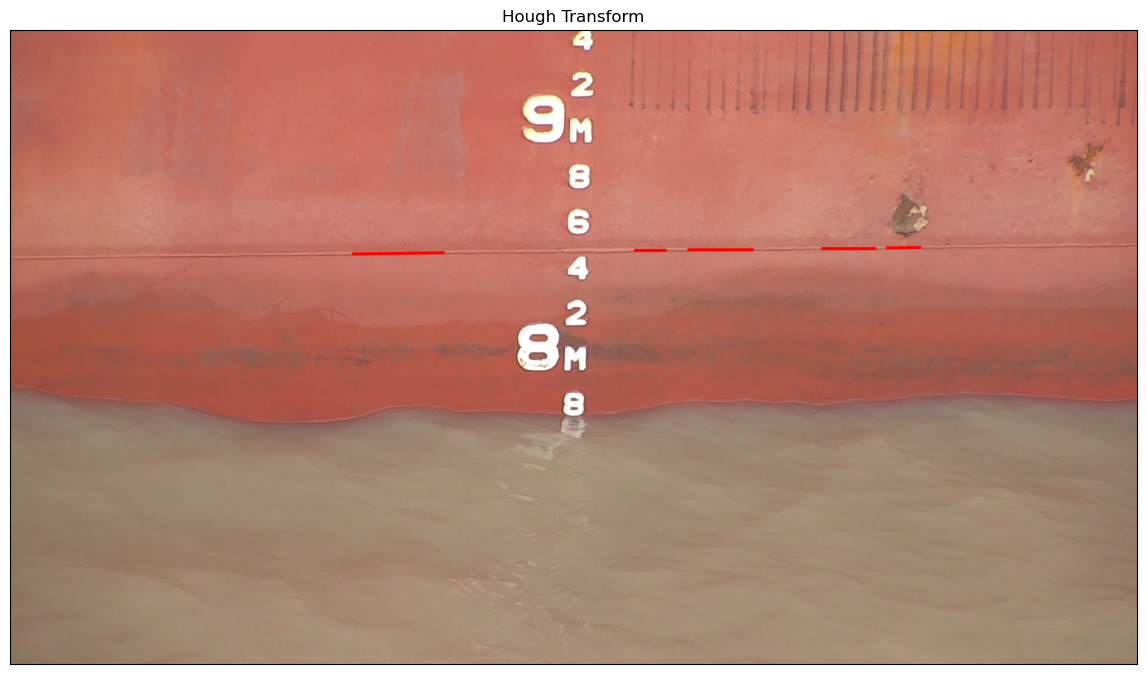

In [60]:
# EXEC JUPYTER NOTEBOOK
# Hough Line Trasnform
copy = image.copy()   # Fazendo uma cópia da imagem original para desenhar as retas

# # CLÁSSICA
# lines = cv.HoughLines(edges, 1, np.pi/180, 150, None, 0, 0)
# if lines is not None:
#   for i in range(0, len(lines)):-
#     rho = lines[i][0][0]
#     theta = lines[i][0][1]
#     a = np.cos(theta)
#     b = np.sin(theta)
#     x0 = a * rho
#     y0 = b * rho
#     pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
#     pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
#     cv.line(copy, pt1, pt2, (0,0,255), 3, cv.LINE_AA)

# PROBABILÍSTICA
linesP = cv.HoughLinesP(edges, 1, np.pi/180, 50, None, 50, 10)

if linesP is not None:
  for i in range(0, len(linesP)):
    l = linesP[i][0]
    cv.line(copy, (l[0], l[1]), (l[2], l[3]), (255,0,0), 3, cv.LINE_AA)

displayImg(copy, 'Hough Transform')